<a href="https://colab.research.google.com/github/mhc999/DL-Projects/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies


In [2]:
# import numpy as np = image data is converted into numpy arrays
# matplotlib and seaborn = for generating plots
# cv = computer vision = used for image recognition tasks
# cv2_imshow = used to display an image (only while using colab)
# PIL = pillow 
# from PIL import Image = load and show an image with pillow
# tensorflow = DL lib
# tf.random.set_seed(3)  = to fix the randomness of the result
# keras = lib used to create neural networks
# mnist = large database of handwritten digits = Modified National Institute of Standards and Technology
# confusion_matrix = counts the number of times class A are classified as class B


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf 
tf.random.set_seed(3) 
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Load the MNIST data from keras datasets


In [3]:
# image processing is already done and the data is also split in training and testing data
(X_train, Y_train) , (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# the data is already converted to numpy arrays
type(X_train)

numpy.ndarray

In [5]:
# X_train consists of 60000 images and each img has dimensions of 28*28 pixels
# In case of RGB, you'll have a third parameter as'3'. For grayscale, only one color channel.
# X_train has all the training data images and Y_train contains the labels for that data
# pixel values range between 0 and 255. 0 = completely black , 255 = completely white 

print(X_train.shape, Y_train.shape , X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
# eg: printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [7]:
# single image dimension 
print(X_train[10].shape)

(28, 28)


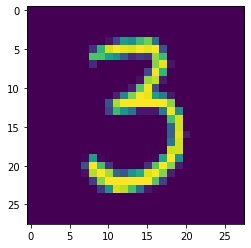

3


In [8]:
# displaying the image

plt.imshow(X_train[50])
plt.show()

# print the corresponding label
print(Y_train[50])

In [9]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [10]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
# One Hot Encoding 
# For 0 : 1 0 0 0 0 0 0 0 0 0
# For 1 : 0 1 0 0 0 0 0 0 0 0 
# and so on...

In [12]:
# All the images have same dimensions here. Or else, resize the images to a common dimension

In [13]:
# NORMALIZATION OR SCALING THE VALUES (similar to Standardization  )
# Instead of having huge values like 0 to 255, we convert them to values btwn 0 and 1 
# It makes it easier for the neural network to understand the data better


X_train = X_train/255
X_test = X_test/255

In [14]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

BUILDING THE NEURAL NETWORK

In [15]:
# CNN - used for image recognition - convolutional neural network
# RNN - used for text/audio recognition - recurrent neural network

In [16]:
# setting up the layers of the neural networks

# Flatten = we can not feed the data in the form of matrix. We have to feed this in a single dimension array.
# input_shape = dimension of the images
# Dense = all the layers in this neural network will be connected to neurons in previous and next layer
# 50 = could be any number. No. of neurons in this layer.
# relu = Applies the rectified linear unit activation function. 
# in output layer, 10 = no.of classes in labels [0 1 2 3 4 5 6 7 8 9] 
# sigmoid function also known as logistic function is considered as the primary choice as an activation function since it’s output exists between (0,1)

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
                  
])

In [112]:
# compiling the neural network
# optimizer = determines the most optimum model parameters for which accuracy scores will be high
# Adaptive Moment Estimation is an algorithm for optimization technique for gradient descent. 
# The method is really efficient when working with large problem involving a lot of data or parameters.
# It requires less memory and is efficient.
# for notes on ADAM : https://www.geeksforgeeks.org/intuition-of-adam-optimizer/
# sparse_categorical_crossentropy = when the labels are simple label encoded values
# metrics = ['accuracy'] == the accuracy will be shown when the model is run

model.compile(optimizer ='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )



In [22]:
# training the neural network 
# epochs = no. of times the neural network should go through the data
# Each time it will change the parameters and give the accuracy values
# Here : Training data accuracy = 99%

model.fit(X_train,Y_train, epochs = 10)


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0345 - accuracy: 0.9883
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0299 - accuracy: 0.9905
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0245 - accuracy: 0.9919
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0231 - accuracy: 0.9923
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0224 - accuracy: 0.9928
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0209 - accuracy: 0.9930
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0191 - accuracy: 0.9936
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0174 - accuracy: 0.9940
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0178 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.015

In [24]:
# Finding the accuracy on test data
# The model will analyse the test data and compare the values to Y_test labels, then it predicts the accuracy
# Here: Test data accuracy = 97%
# No overfitting has occured ( accuracy of test data is not very low )

loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1413 - accuracy: 0.9703
0.970300018787384


In [25]:
print(X_test.shape)

(10000, 28, 28)


To check the inidvidual predictions made by the model :


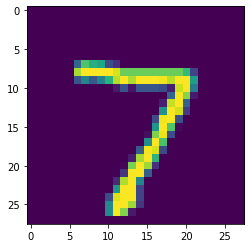

In [26]:
# display first data point in X_test

plt.imshow(X_test[0])
plt.show()

In [27]:
print(Y_test[0])

7


In [28]:
Y_pred = model.predict(X_test)
print(Y_pred.shape)

313/313 [==============================] - 1s 2ms/step
(10000, 10)


In [29]:
# predict() = gives 10 values in keras
# They are the probabilities of the given image being equal to 0 1 2 and so on
# model.predict() gives the prediction probability of each class for that data point

print(Y_pred[0])

[4.4043925e-05 7.0797527e-01 2.0704341e-01 8.7006408e-01 1.5386746e-08
 5.4191073e-06 1.7455143e-14 1.0000000e+00 6.2861491e-06 1.3012755e-01]


In [30]:
# converting the prediction probabilities to class labels
# np.argmax = gives the index of maximum value from all the prediction probabilities

label_first_test_img = np.argmax(Y_pred[0])
print(label_first_test_img)

7


In [32]:
print(Y_pred)

[[4.4043925e-05 7.0797527e-01 2.0704341e-01 ... 1.0000000e+00
  6.2861491e-06 1.3012755e-01]
 [4.1110718e-07 9.9313587e-01 1.0000000e+00 ... 2.2909131e-12
  9.9732286e-01 1.0946879e-15]
 [1.0612784e-05 9.9984866e-01 1.1090331e-04 ... 5.9844423e-03
  8.4251189e-01 6.3019652e-05]
 ...
 [6.6640297e-08 1.0138471e-07 3.2911143e-09 ... 5.8853719e-03
  2.7342592e-04 9.0017551e-01]
 [3.2058583e-07 3.0923547e-07 2.9370282e-04 ... 1.9885297e-04
  9.8483676e-01 3.7421891e-05]
 [1.0654103e-06 1.5185624e-05 9.5741481e-05 ... 2.0917891e-08
  3.6814315e-06 6.3735803e-15]]


In [33]:
# converting predicition probabilities to class label for all test data points
# Y_test = true labels
# Y_pred = predicted labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 0, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 8, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 9, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

MODEL EVALUATION USING CONFUSION MATRIX

In [34]:
# conf_mat = confusion_matrix(true labels, predicted labels)

In [35]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [36]:
print(conf_mat)

tf.Tensor(
[[ 968    1    0    1    1    2    3    1    2    1]
 [   0 1120    0    3    0    2    2    1    6    1]
 [   6    5  994    2    3    1    2   12    6    1]
 [   0    0    6  975    0   15    0    4    5    5]
 [   1    1    2    0  959    1    7    1    2    8]
 [   2    1    0   13    1  871    3    1    0    0]
 [   5    3    1    1    6   10  930    0    2    0]
 [   3    7    8    3    0    0    0 1000    3    4]
 [   3    1    2    8    3    6    4    4  941    2]
 [   0    5    0   12   10   18    1   11   13  939]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

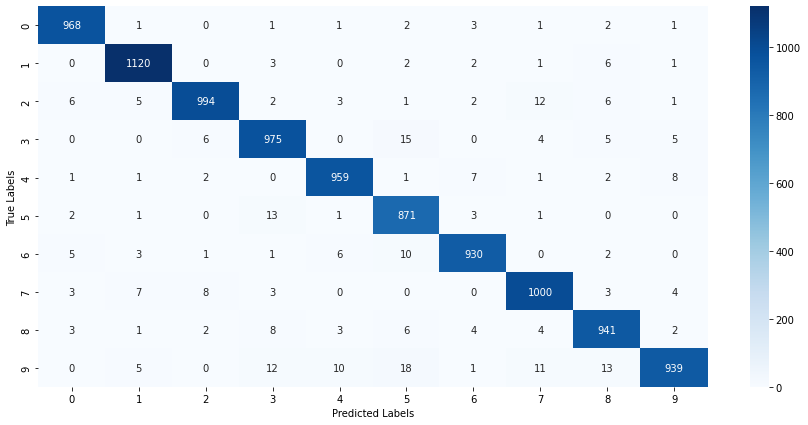

In [37]:
# building the heat map using seaborn
# figsize can be anything
# annot = True = show the annotations 
# fmt = 'd' = when all the values are integers
# 967 : Y axis = 0 and X axis = 0. 967 0 images were correctly predicted as 0
# Next , 0 : None of the 0 true labels were predicted as 1


plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap ='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

BUILDING A PREDICTIVE SYSTEM


In [94]:
input_image_path = '/content/MNIST_digit.png'
input_image = cv2.imread(input_image_path)

In [95]:
type(input_image)

numpy.ndarray

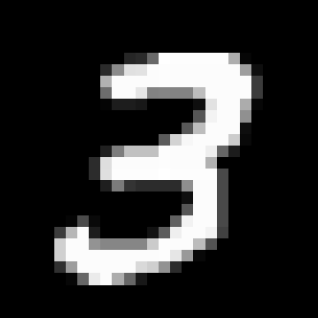

In [96]:
# displaying the image
cv2_imshow(input_image)

In [97]:
# here, the image is RGB. But we have only trained with grayscale images
# we have to convert RGB to grayscale and resize the img to (28,28)

print(input_image.shape)

(318, 318, 3)


In [98]:
# conerting RGB to grayscale
# cv2.cvtColor() method is used to convert an image from one color space to another

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [99]:
grayscale.shape

(318, 318)

In [100]:
# resizing the image
resized_image = cv2.resize(grayscale, (28,28))

In [101]:
resized_image.shape

(28, 28)

In [102]:
cv2_imshow(resized_image)

In [103]:
# Normalising the vector

resized_image = resized_image/255

In [104]:
# we trained our neural network to deal with 10 labels, instead we need it to deal with only one label
# predicting only one image in the size 28,28 = [1,28,28]
# In the case of RGB images = [1,28,28, 3]
# reshape the model to evaluate only one image 

image_reshaped = np.reshape(resized_image , [1,28,28])

In [105]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 19ms/step
[[4.5166989e-16 4.5650160e-01 3.1132334e-08 1.0000000e+00 8.4580879e-17
  6.8850505e-01 1.0159011e-18 8.0789841e-06 1.9439098e-01 5.3111714e-04]]


In [106]:
input_pred_label = np.argmax(input_prediction)

In [107]:
print(input_pred_label)

3


**PREDICTIVE SYSTEM:**

Path of the image to be predicted: /content/7.png


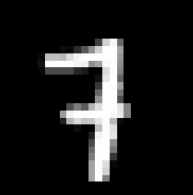

1/1 [==============================] - 0s 18ms/step
The handwritten digit is recognized as :  7


In [111]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
resized_image = cv2.resize(grayscale, (28,28))
resized_image = resized_image/255
image_reshaped = np.reshape(resized_image , [1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print('The handwritten digit is recognized as : ',input_pred_label)